In [103]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Experimental setup

In [87]:
experiments = pd.read_csv("../data/intermediate/experiment_setup.txt",sep="\t")
samples = list(experiments["sample"])

sample_groups = [samples[0:3],
                 samples[3:6],
                 samples[6:9],
                 samples[9:12],
                 samples[12:15],
                 samples[15:18],
                 samples[18:21],
                ]
sample_names = ["RPL22_oe_c",
                "RPL22_oe_t",
                "RPL22L1_oe_c",
                "RPL22L1_oe_t",
                "shluc",
                "sh704",
                "sh705"]

# Partitions

## Partition exon psis

In [88]:
splice_types = ["A3","A5","AF","AL","MX","RI","SE"]

psis = [pd.read_csv("../data/intermediate/suppa_exon_psis/"+x+".psi",sep="\t") for x in splice_types]

for splice_type, splice_psis in zip(splice_types, psis):
    
    for sample_name, sample_group in zip(sample_names, sample_groups):
        
        sample_psis = splice_psis[sample_group]
        
        sample_psis.to_csv("../data/intermediate/suppa_exon_psis_grouped/"+splice_type+"_"+sample_name+".psi",
                           sep="\t",
                           na_rep='NA',
                           index_label=False
                          )
        

## Partition transcript psis

In [111]:
transcript_psis = pd.read_csv("../data/intermediate/suppa_isoforms_isoform.psi",sep="\t")

for sample_name, sample_group in zip(sample_names, sample_groups):
        
        sample_psis = transcript_psis[sample_group]
        
        sample_psis.to_csv("../data/processed/grouped_transcript_psis/"+sample_name+".txt",
                           sep="\t",
                           na_rep='NA',
                           index_label=False)

## Partition TPMs

In [82]:
suppa_tpms = pd.read_csv("../data/processed/tpm_matrix_suppa.txt",sep="\t")

for sample_name, sample_group in zip(sample_names, sample_groups):
        
        sample_tpms = suppa_tpms[sample_group]
        
        sample_tpms.to_csv("../data/processed/grouped_tpms/"+sample_name+".txt",
                           sep="\t",
                           index_label=False)
        

# Differential splicing results

In [116]:
rpl22_oe = pd.read_csv("../data/intermediate/suppa_diff_psis/RPL22_oe.dpsi.temp.0",
                       sep="\t",
                       names=["diff","pval"])

In [117]:
rpl22_oe.sort_values(by="pval")

,diff,pval
ENSG00000099956;ENST00000635578,-0.3736035681,0.0000000000
ENSG00000163584;ENST00000463836,-0.2398479944,0.0000000000
ENSG00000164919;ENST00000517682,-0.1754972234,0.0000000000
ENSG00000164576;ENST00000520731,-0.3181834003,0.0000000000
ENSG00000225449;ENST00000433431,0.4483255141,0.0000000000
ENSG00000121864;ENST00000484866,0.2588556350,0.0000000000
ENSG00000163584;ENST00000475836,0.2290840376,0.0000000000
ENSG00000129103;ENST00000434526,-0.2313139580,0.0004995005
ENSG00000101544;ENST00000262198,0.3020768541,0.0004995005
ENSG00000101544;ENST00000561195,-0.3073578806,0.0004995005


In [105]:
experiments = ["RPL22_oe","RPL22L1_oe","sh704","sh705"]
splice_types = ["A3","A5","AF","AL","MX","RI","SE"]

def merge_splices(exp):
    merged_splices = []
    
    for s in splice_types:
        diffs = pd.read_csv("../data/intermediate/suppa_diff_psis/"+s+"_"+exp+".dpsi.temp.0",
                            sep="\t",index_col=0)
        
        diffs.columns = ["difference","pval"]
        diffs["type"] = s
        merged_splices.append(diffs)
        
    return pd.concat(merged_splices,axis=0)

RPL22_oe = merge_splices("RPL22_oe")
RPL22L1_oe = merge_splices("RPL22L1_oe")
sh704 = merge_splices("sh704")
sh705 = merge_splices("sh705")

# for experiment in experiments:

In [119]:
rpl22_oe[rpl22_oe.index.map(lambda x: "ENSG00000198625" in x)]

,diff,pval
ENSG00000198625;ENST00000367179,0.0487311496,0.1308691309
ENSG00000198625;ENST00000367180,0.0039066306,0.3391608392
ENSG00000198625;ENST00000367182,-0.2782605161,0.0034965035
ENSG00000198625;ENST00000367183,0.0000000000,0.3611388611
ENSG00000198625;ENST00000391947,0.1505597711,0.0184815185
ENSG00000198625;ENST00000444261,-0.0412116193,0.1518481518
ENSG00000198625;ENST00000454264,0.0261010930,0.2117882118
ENSG00000198625;ENST00000462012,0.0623352560,0.0974025974
ENSG00000198625;ENST00000463049,0.0000000000,0.3611388611
ENSG00000198625;ENST00000470797,0.0666328155,0.0924075924


In [109]:
select = RPL22_oe[RPL22_oe["type"]=="A3"]

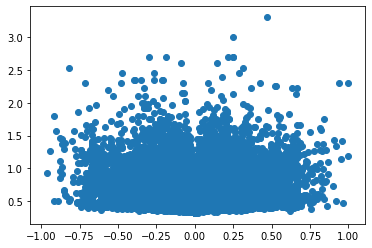

In [110]:
plt.scatter(RPL22_oe["difference"],-np.log10(RPL22_oe["pval"]))

In [108]:
RPL22_oe.sort_values(by="pval")

,difference,pval,type
Event_id,,,
ENSG00000165868;AF:10:116835022-116849566:116849741:116835022-116850091:116850236:-,-1.000000,0.000000,AF
ENSG00000120913_and_ENSG00000248235_and_ENSG00000241852;AL:8:22591668-22593733:22594086:22591668-22600882:22601360:+,-1.000000,0.000000,AL
ENSG00000100811_and_ENSG00000258904_and_ENSG00000283840;SE:14:100262466-100274698:100274758-100276490:+,0.360931,0.000000,SE
ENSG00000215788_and_ENSG00000171680;AF:1:6477658-6485324:6485469:6477658-6496493:6496696:-,1.000000,0.000000,AF
ENSG00000102316_and_ENSG00000221716;RI:X:54815248:54815690-54815881:54816007:+,-0.714803,0.000000,RI
ENSG00000074696;AF:15:65530588:65530718-65551676:65531260:65531441-65551676:+,-1.000000,0.000000,AF
ENSG00000164919;AL:8:99878148:99878265-99887490:99885992:99886382-99887490:-,0.865311,0.000000,AL
ENSG00000184368_and_ENSG00000264566;SE:X:20044524-20050824:20050946-20052878:-,-1.000000,0.000000,SE
ENSG00000131097;AL:17:44848252-44849106:44849213:44848252-44850332:44850476:+,1.000000,0.000000,AL
